우리나라 사람들이 선호 하는 장르가 있을것이다!

어떤 장르의 드라마가 시청률이 높고 낮은지 살펴보자!


인기가 없는 장르의 시청률을 높이기 위한 컨설팅??
- 보다 인기가 없는 장르의 드라마에도,  시청률 상위권에 위치한 드라마가 소수 있다.(해당 드라마의 특징을 파악하고, 추후에 비슷한 장르의 드라마를 제작 할때 참고 할 수 있지 않을까?)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 di

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
rating = pd.read_csv('/content/drive/MyDrive/2023-2 EDA/전체시청률.csv')
metadata = pd.read_csv('/content/drive/MyDrive/2023-2 EDA/메타_전처리1.csv')
actors_quality = pd.read_csv('/content/drive/MyDrive/2023-2 EDA/배우브랜드.csv')

# 황금 시간대

## 필요한 데이터프레임 만들기

In [5]:
mean_rating = pd.DataFrame(rating.groupby('작품명')['시청률'].mean())
mean_rating

,시청률
작품명,
(아는 건 별로 없지만) 가족입니다,4.177688
17세의 조건,2.850000
18 어게인,2.724813
365: 운명을 거스르는 1년,4.329167
"60일, 지정생존자",4.464313
...,...
환혼 빛과 그림자,7.838500
황금 가면,14.755000
황금정원,7.411667


In [6]:
Data = pd.merge(metadata,mean_rating,on = "작품명")
Data = Data.drop(['출연자','요일'],axis=1)
Data

,작품명,장르,방송사,전체회차,시작일,종료일,월,화,수,목,...,한지민,한지현,한지혜,한채영,한효주,함은정,현빈,황민현,황정음,시청률
0,왼손잡이 아내,"['복수', ' 멜로']",KBS 2TV,3,2019-01-02 00:00:00,2019-05-31 00:00:00,1,1,1,1,...,0,0,0,0,0,0,0,0,0,14.569903
1,동네변호사 조들호 2: 죄와 벌,['법률 드라마'],KBS 2TV,40,2019-01-07 00:00:00,2019-03-26 00:00:00,1,1,0,0,...,0,0,0,0,0,0,0,0,0,5.830000
2,왕이 된 남자,['사극'],tvN,16,2019-01-07 00:00:00,2019-03-04 00:00:00,1,1,0,0,...,0,0,0,0,0,0,0,0,0,8.409562
3,왜그래 풍상씨,"['가족', ' 코미디', ' 복수', ' 막장']",KBS 2TV,40,2019-01-09 00:00:00,2019-03-14 00:00:00,0,0,1,1,...,0,0,0,0,0,0,0,0,0,12.187500
4,용왕님 보우하사,['드라마'],MBC,21,2019-01-14 00:00:00,2019-07-12 00:00:00,1,1,1,1,...,0,0,0,0,0,0,0,0,0,6.935537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,넘버스 : 빌딩숲의 감시자들,"['오피스', ' 복수', ' 범죄', ' 스릴러']",MBC,12,2023-06-23 00:00:00,2023-07-29 00:00:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.637500
333,악귀,"['판타지', ' 미스터리', ' 스릴러']",SBS TV,12,2023-06-23 00:00:00,2023-07-29 00:00:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.275000
334,아씨두리안,"['SF', ' 드라마', ' 로맨스']","TV CHOSUN, 쿠팡플레이",16,2023-06-24 00:00:00,2023-08-13 00:00:00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.974563
335,가슴이 뛴다,"['공포', ' 로맨스', ' 코미디']",KBS 2TV,16,2023-06-26 00:00:00,2023-08-15 00:00:00,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.262500


In [7]:
Data_time = Data[['작품명','시작시간','월','화','수','목','금','토','일','시청률']]
Data_time

,작품명,시작시간,월,화,수,목,금,토,일,시청률
0,왼손잡이 아내,7:50,1,1,1,1,1,0,0,14.569903
1,동네변호사 조들호 2: 죄와 벌,10:00,1,1,0,0,0,0,0,5.830000
2,왕이 된 남자,9:30,1,1,0,0,0,0,0,8.409562
3,왜그래 풍상씨,10:00,0,0,1,1,0,0,0,12.187500
4,용왕님 보우하사,7:10,1,1,1,1,1,0,0,6.935537
...,...,...,...,...,...,...,...,...,...,...
332,넘버스 : 빌딩숲의 감시자들,9:50,0,0,0,0,1,1,0,3.637500
333,악귀,10:00,0,0,0,0,1,1,0,10.275000
334,아씨두리안,9:10,0,0,0,0,0,1,1,3.974563
335,가슴이 뛴다,9:45,1,1,0,0,0,0,0,3.262500


## 데이터프레임 시간별로 쪼개기(7시 이후에 방영한 드라마, 8시 이후에 방영한 드라마.....)

In [8]:
Data_time['시작시간'].unique()
#7:05~11:20

array(['7:50', '10:00', '9:30', '7:10', '9:00', '10:50', '11:00', '10:20',
       '9:05', '7:55', '11:10', '8:30', '8:55', '9:10', '10:30', '9:40',
       nan, '9:35', '9:25', '9:15', '9:20', '10:40', '7:05', '9:16',
       '11:20', '9:12', '22:30', '9:50', '10:32', '10:31', '8:05', '8:40',
       '10:35', '8:50', '9:53', '9:45'], dtype=object)

In [9]:
time1 = Data_time[(Data_time['시작시간']=='7:05')|(Data_time['시작시간']=="7:10")|(Data_time['시작시간']=='7:50')|(Data_time['시작시간']=='7:55')]
time1

,작품명,시작시간,월,화,수,목,금,토,일,시청률
0,왼손잡이 아내,7:50,1,1,1,1,1,0,0,14.569903
4,용왕님 보우하사,7:10,1,1,1,1,1,0,0,6.935537
22,세상에서 제일 예쁜 내 딸,7:55,0,0,0,0,0,1,1,27.644444
44,태양의 계절,7:50,1,1,1,1,1,0,0,12.669608
75,사랑은 뷰티풀 인생은 원더풀,7:55,0,0,0,0,0,1,1,23.457000
86,우아한 모녀,7:50,1,1,1,1,1,0,0,14.103883
115,한 번 다녀왔습니다,7:55,0,0,0,0,0,1,1,28.431000
116,위험한 약속,7:50,1,1,1,1,1,0,0,13.726923
133,찬란한 내 인생,7:10,1,1,1,1,1,0,0,5.377165
149,비밀의 남자,7:50,1,1,1,1,1,0,0,16.315238


In [10]:
time2 = Data_time[(Data_time['시작시간']=='8:05')|(Data_time['시작시간']=="8:30")|(Data_time['시작시간']=='8:40')|(Data_time['시작시간']=='8:50')|(Data_time['시작시간']=='8:55')]
time2

,작품명,시작시간,월,화,수,목,금,토,일,시청률
31,여름아 부탁해,8:30,1,1,1,1,1,0,0,19.324219
38,봄밤,8:55,0,0,1,1,0,0,0,6.368750
42,검법남녀 2,8:55,1,1,0,0,0,0,0,6.903125
54,신입사관 구해령,8:55,0,0,1,1,0,0,0,5.282500
59,웰컴2라이프,8:55,1,1,0,0,0,0,0,4.775000
78,어쩌다 발견한 하루,8:55,0,0,1,1,0,0,0,3.226667
84,꽃길만 걸어요,8:30,1,1,1,1,1,0,0,19.419512
89,하자있는 인간들,8:55,0,0,1,1,0,0,0,2.643750
99,더 게임: 0시를 향하여,8:55,0,0,1,1,0,0,0,3.437500
109,그 남자의 기억법,8:55,0,0,1,1,0,0,0,3.493750


In [11]:
time3 = Data_time[(Data_time['시작시간']=='9:05')|(Data_time['시작시간']=='9:10')|(Data_time['시작시간']=='9:12')|(Data_time['시작시간']=='9:15')|(Data_time['시작시간']=='9:16')|(Data_time['시작시간']=='9:20')|(Data_time['시작시간']=='9:25')|(Data_time['시작시간']=='9:00')|(Data_time['시작시간']=='9:35')|(Data_time['시작시간']=='9:40')|(Data_time['시작시간']=='9:30')|(Data_time['시작시간']=='9:45')|(Data_time['시작시간']=='9:50')|(Data_time['시작시간']=='9:50')]
time3

,작품명,시작시간,월,화,수,목,금,토,일,시청률
2,왕이 된 남자,9:30,1,1,0,0,0,0,0,8.409562
6,로맨스는 별책부록,9:00,0,0,0,0,0,1,1,5.150812
8,진심이 닿다,9:30,0,0,1,1,0,0,0,3.969375
12,눈이 부시게,9:30,1,1,0,0,0,0,0,6.272333
16,슬플 때 사랑한다,9:05,0,0,0,0,0,1,0,9.707500
...,...,...,...,...,...,...,...,...,...,...
330,행복배틀,9:00,0,0,1,1,0,0,0,1.687000
331,이번 생도 잘 부탁해,9:20,0,0,0,0,0,1,1,4.796100
332,넘버스 : 빌딩숲의 감시자들,9:50,0,0,0,0,1,1,0,3.637500
334,아씨두리안,9:10,0,0,0,0,0,1,1,3.974563


In [12]:
time4 = Data_time[(Data_time['시작시간']=='10:00')|(Data_time['시작시간']=="10:50")|(Data_time['시작시간']=='10:20')|(Data_time['시작시간']=='10:30')|(Data_time['시작시간']=='10:40')|(Data_time['시작시간']=="22:30")|(Data_time['시작시간']=="10:32")|(Data_time['시작시간']=="10:31")|(Data_time['시작시간']=="10:35")]
time4

,작품명,시작시간,월,화,수,목,금,토,일,시청률
1,동네변호사 조들호 2: 죄와 벌,10:00,1,1,0,0,0,0,0,5.830000
3,왜그래 풍상씨,10:00,0,0,1,1,0,0,0,12.187500
5,봄이 오나 봄,10:00,0,0,1,1,0,0,0,2.506250
7,바벨,10:50,0,0,0,0,0,1,1,3.160000
11,트랩,10:20,0,0,0,0,0,1,1,3.294429
...,...,...,...,...,...,...,...,...,...,...
324,가면의 여왕,10:30,1,1,0,0,0,0,0,2.547875
325,나쁜 엄마,10:30,0,0,1,1,0,0,0,8.158714
326,낭만닥터 김사부 3,10:00,0,0,0,0,1,1,0,13.725000
333,악귀,10:00,0,0,0,0,1,1,0,10.275000


In [13]:
time5 = Data_time[(Data_time['시작시간']=='11:00')|(Data_time['시작시간']=="11:10")|(Data_time['시작시간']=='11:20')]
time5

,작품명,시작시간,월,화,수,목,금,토,일,시청률
9,리갈 하이,11:00,0,0,0,0,1,1,0,2.509438
10,막돼먹은 영애씨 17,11:00,0,0,0,0,1,0,0,2.642333
17,빙의,11:00,0,0,1,1,0,0,0,1.871000
26,아름다운 세상,11:00,0,0,0,0,1,1,0,3.785438
28,회사 가기 싫어,11:10,0,1,0,0,0,0,0,1.250000
35,구해줘 2,11:00,0,0,1,1,0,0,0,2.138875
48,평일 오후 세시의 연인,11:00,0,0,0,0,1,1,0,1.540188
51,미스터 기간제,11:00,0,0,1,1,0,0,0,3.300875
62,힙합왕 - 나스나길,11:10,0,0,0,0,1,0,0,1.141667
64,우아한 가,11:00,0,0,1,1,0,0,0,4.925250


## 방영 시간대별 평균 시청률

In [14]:
time1_avg = time1['시청률'].mean()
time1_avg

15.20592099323367

In [15]:
time2_avg = time2['시청률'].mean()
time2_avg

10.224818110193178

In [16]:
time3_avg = time3['시청률'].mean()
time3_avg

4.976067785313001

In [17]:
time4_avg = time4['시청률'].mean()
time4_avg

5.504950556466373

In [18]:
time5_avg = time5['시청률'].mean()
time5_avg

2.199684259259259

## 시간대별 시청률 시각화

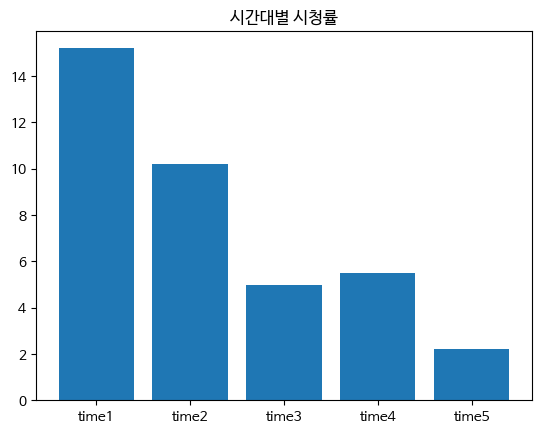

In [19]:
x = np.arange(5)
years = ['time1', 'time2', 'time3', 'time4','time5']
values = [time1_avg, time2_avg, time3_avg, time4_avg, time5_avg]

plt.bar(x, values)
plt.xticks(x, years)
plt.title('시간대별 시청률')
plt.show()

1등. 7시~8시 사이

2등. 8시~9시 사이

3등. 10시~11시 사이

4등. 9시~10시 사이

5등. 11시 이후

# 우리 나라 사람들이 선호하는 장르?

## 데이터 불러오기

In [20]:
Data = pd.merge(rating,metadata,on="작품명")
Data = Data.drop(['방영연도','월_x','일_x','회차','방송사','출연자','시작일','종료일','요일'],axis=1)
Data['전체회차'] = Data['전체회차'] * Data['연속방송']
Data = Data.drop(['연속방송'],axis=1)
Data.rename(columns ={'월_y':'월'},inplace = True)
Data

,작품명,방송일자,시청률,장르,전체회차,월,화,수,목,금,...,한예리,한지민,한지현,한지혜,한채영,한효주,함은정,현빈,황민현,황정음
0,(아는 건 별로 없지만) 가족입니다,2020-06-01,3.122,"['멜로', ' 가족']",16,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,(아는 건 별로 없지만) 가족입니다,2020-06-02,3.930,"['멜로', ' 가족']",16,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,(아는 건 별로 없지만) 가족입니다,2020-06-08,3.345,"['멜로', ' 가족']",16,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,(아는 건 별로 없지만) 가족입니다,2020-06-09,3.862,"['멜로', ' 가족']",16,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,(아는 건 별로 없지만) 가족입니다,2020-06-15,3.188,"['멜로', ' 가족']",16,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,힙합왕 - 나스나길,2019-08-16,1.200,"['음악', ' 청춘', ' 드라마']",12,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7829,힙합왕 - 나스나길,2019-08-23,1.300,"['음악', ' 청춘', ' 드라마']",12,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7830,힙합왕 - 나스나길,2019-08-30,1.350,"['음악', ' 청춘', ' 드라마']",12,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7831,힙합왕 - 나스나길,2019-09-06,0.600,"['음악', ' 청춘', ' 드라마']",12,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 시청률 기준으로 나누기 (상위,중상위,중하위,하위)

In [21]:
t = list(range(52))

In [22]:
Data_rate = pd.DataFrame(Data.groupby('장르')['시청률'].mean())
Data_rate = Data_rate.sort_values(by='시청률')
Data_rateb = Data_rate.iloc[0:52]
Data_ratemb = Data_rate.iloc[52:104]
Data_ratemg = Data_rate.iloc[104:156]
Data_rateg = Data_rate.iloc[156:208]
Data_rateb['장르'] = Data_rateb.index
Data_ratemb['장르'] = Data_ratemb.index
Data_ratemg['장르'] = Data_ratemg.index
Data_rateg['장르'] = Data_rateg.index
Data_rateb.index = t
Data_ratemb.index = t
Data_ratemg.index = t
Data_rateg.index = t

<ipython-input-22-51f24172b1c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_rateb['장르'] = Data_rateb.index
<ipython-input-22-51f24172b1c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_ratemb['장르'] = Data_ratemb.index
<ipython-input-22-51f24172b1c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

## 시청률기준으로 나눈 데이터프레임 생성

In [23]:
Data_rateg = pd.merge(Data_rateg,Data, on =['장르'])
Data_ratemg = pd.merge(Data_ratemg,Data, on =['장르'])
Data_rateb = pd.merge(Data_rateb,Data, on =['장르'])
Data_ratemb = pd.merge(Data_ratemb,Data, on =['장르'])

In [24]:
Data_rateg = Data_rateg.drop('시청률_x',axis=1)
Data_ratemg = Data_ratemg.drop('시청률_x',axis=1)
Data_ratemb = Data_ratemb.drop('시청률_x',axis=1)
Data_rateb = Data_rateb.drop('시청률_x',axis=1)
Data_rateg.rename(columns ={'시청률_y':'시청률'},inplace = True)
Data_ratemg.rename(columns ={'시청률_y':'시청률'},inplace = True)
Data_ratemb.rename(columns ={'시청률_y':'시청률'},inplace = True)
Data_rateb.rename(columns ={'시청률_y':'시청률'},inplace = True)

In [25]:
Data_rateg = Data_rateg.drop(['월','화','수','목','금','토','일_y','시작시간','전체회차'],axis=1).iloc[:,:154]
Data_ratemg = Data_ratemg.drop(['월','화','수','목','금','토','일_y','시작시간','전체회차'],axis=1).iloc[:,:154]
Data_ratemb = Data_ratemb.drop(['월','화','수','목','금','토','일_y','시작시간','전체회차'],axis=1).iloc[:,:154]
Data_rateb = Data_rateb.drop(['월','화','수','목','금','토','일_y','시작시간','전체회차'],axis=1).iloc[:,:154]

In [26]:
Data_rateg #시청률 상위권의 드라마 관련 데이터

,장르,작품명,방송일자,시청률,SF,가족,감성,격정멜로,공포,교육,...,판타지 사극,판타지 액션 로맨스,프라이빗 오피스 멜로,하드보일드,학원물 로맨스,현대 판타지,회사 드라마,휴머니즘,휴먼,휴먼 판타지 드라마
0,"['액션', ' 코미디', ' 로맨스']",굿캐스팅,2020-04-27,10.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"['액션', ' 코미디', ' 로맨스']",굿캐스팅,2020-04-28,10.30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"['액션', ' 코미디', ' 로맨스']",굿캐스팅,2020-05-04,9.15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"['액션', ' 코미디', ' 로맨스']",굿캐스팅,2020-05-05,9.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"['액션', ' 코미디', ' 로맨스']",굿캐스팅,2020-05-11,9.45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,"['멜로', ' 로맨틱 코미디', ' 가족', ' 드라마']",신사와 아가씨,2022-03-13,38.20,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3030,"['멜로', ' 로맨틱 코미디', ' 가족', ' 드라마']",신사와 아가씨,2022-03-19,34.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3031,"['멜로', ' 로맨틱 코미디', ' 가족', ' 드라마']",신사와 아가씨,2022-03-20,36.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3032,"['멜로', ' 로맨틱 코미디', ' 가족', ' 드라마']",신사와 아가씨,2022-03-26,34.60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 걱각의 데이터프레임 자주 등장하는 장르 구하기

In [27]:
total_samplesg = Data_rateg.iloc[:,4:].sum().sum()
genreg_percentages = (Data_rateg.iloc[:,4:].sum() / total_samplesg) * 100
total_samplesmg = Data_ratemg.iloc[:,4:].sum().sum()
genremg_percentages = (Data_ratemg.iloc[:,4:].sum() / total_samplesmg) * 100
total_samplesmb = Data_ratemb.iloc[:,4:].sum().sum()
genremb_percentages = (Data_ratemb.iloc[:,4:].sum() / total_samplesmb) * 100
total_samplesb = Data_rateb.iloc[:,4:].sum().sum()
genreb_percentages = (Data_rateb.iloc[:,4:].sum() / total_samplesb) * 100
genreg = pd.DataFrame(genreg_percentages)
genremg = pd.DataFrame(genremg_percentages)
genremb = pd.DataFrame(genremb_percentages)
genreb = pd.DataFrame(genreb_percentages)
genreg.columns = ['장르 포함율 상']
genremg.columns = ['장르 포함율 중상']
genremb.columns = ['장르 포함율 중하']
genreb.columns = ['장르 포함율 하']

In [28]:
genreg #시청율 상위권에서 찾을 수 있는 장르의 빈도

,장르 포함율 상
SF,0.000000
가족,5.110805
감성,0.169653
격정멜로,0.106033
공포,0.148447
...,...
현대 판타지,0.169653
회사 드라마,0.000000
휴머니즘,0.000000
휴먼,0.000000


### 같이보기

In [29]:
genres = [genreg,genremg,genremb,genreb]

In [30]:
genre_percentage = pd.concat(genres,axis=1)
genre_percentage = genre_percentage.sort_values(by='장르 포함율 상')
genre_percentage['상 - 하'] = genre_percentage['장르 포함율 상'] - genre_percentage['장르 포함율 하']
#genre_percentage = genre_percentage.sort_values(by='상 - 하')
genre_percentage.index = genre_percentage.index.str.replace(' ', '')
genre_percentage

,장르 포함율 상,장르 포함율 중상,장르 포함율 중하,장르 포함율 하,상 - 하
SF,0.000000,0.000000,0.599925,0.604534,-0.604534
수사,0.000000,0.000000,0.000000,0.806045,-0.806045
서스펜스멜로,0.000000,0.000000,0.000000,0.000000,0.000000
사이언스액션히어로,0.000000,0.000000,0.000000,0.806045,-0.806045
비즈니스,0.000000,0.346696,0.000000,0.806045,-0.806045
...,...,...,...,...,...
복수,6.213551,0.000000,6.749156,0.604534,5.609017
복수,10.062560,8.515710,0.000000,0.806045,9.256514
가족,11.653059,0.000000,4.499438,0.000000,11.653059
로맨스,11.769696,16.078007,10.048744,5.440806,6.328890


In [31]:
genre_percentage = genre_percentage.groupby(genre_percentage.index).sum()
genre_percentage = genre_percentage.sort_values(by='상 - 하')
genre_percentage

,장르 포함율 상,장르 포함율 중상,장르 포함율 중하,장르 포함율 하,상 - 하
로맨틱코미디,1.081540,0.325027,0.000000,9.370277,-8.288737
스릴러,1.622309,2.166847,4.124484,7.909320,-6.287010
판타지,0.699820,3.510293,2.849644,4.836272,-4.136452
드라마,3.933835,29.252438,4.499438,7.808564,-3.874729
휴먼,0.466546,1.386782,1.199850,3.677582,-3.211035
...,...,...,...,...,...
미스테리,2.131269,0.000000,0.000000,0.000000,2.131269
막장,4.750292,1.473456,0.599925,0.000000,4.750292
멜로,14.229668,0.346696,7.161605,6.095718,8.133950
복수,16.276111,8.515710,6.749156,1.410579,14.865531


In [32]:
df = pd.DataFrame(genre_percentage.loc['로맨스'])
df.T

,장르 포함율 상,장르 포함율 중상,장르 포함율 중하,장르 포함율 하,상 - 하
로맨스,12.469515,17.031419,12.898388,13.148615,-0.679099


In [33]:
df1 = genre_percentage[-5:].drop('상 - 하',axis=1)
df1

,장르 포함율 상,장르 포함율 중상,장르 포함율 중하,장르 포함율 하
미스테리,2.131269,0.000000,0.000000,0.000000
막장,4.750292,1.473456,0.599925,0.000000
멜로,14.229668,0.346696,7.161605,6.095718
복수,16.276111,8.515710,6.749156,1.410579
가족,16.763864,0.433369,5.849269,0.806045


시청률 상위권 드라마에서 자주 보이는 장르는 막장, 멜로, 복수, 가족 등이 있다.

호불호가 제일 심하게 갈리는 것은 로맨스!

## 선호 장르 시각화

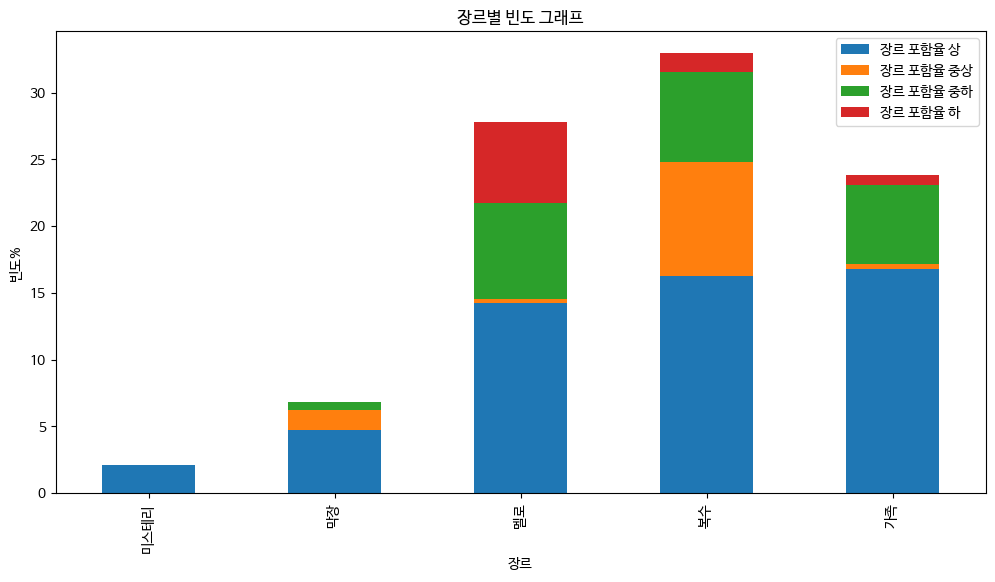

In [34]:
df1.set_index(df1.index, inplace=True)

ax = df1.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('장르별 빈도 그래프')
plt.xlabel('장르')
plt.ylabel('빈도%')

plt.legend(loc='upper right')

plt.show()

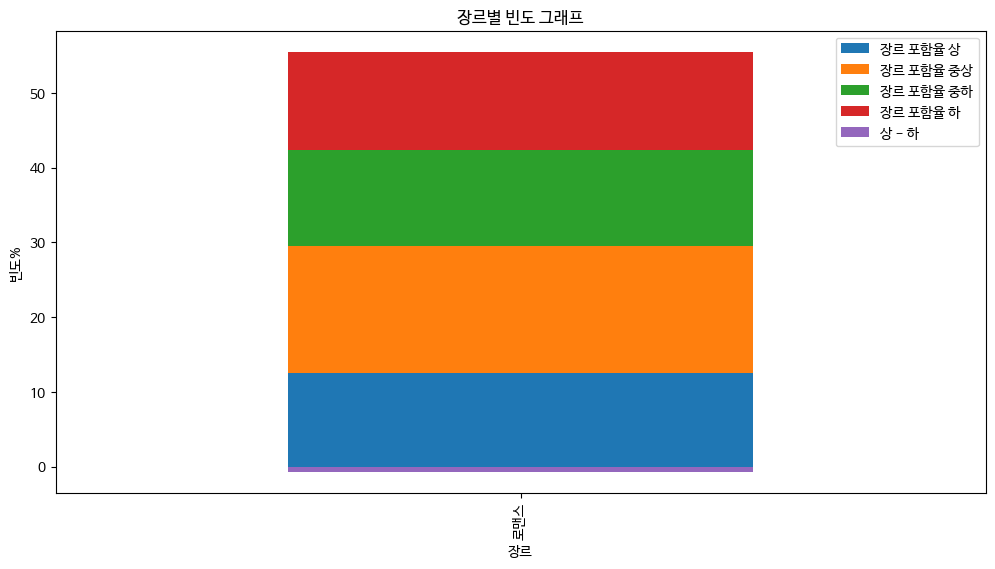

In [35]:
df.T.set_index(df.T.index, inplace=True)

# bar 그래프 그리기
ax = df.T.plot(kind='bar', stacked=True, figsize=(12, 6))

# 그래프에 제목과 축 레이블 설정
plt.title('장르별 빈도 그래프')
plt.xlabel('장르')
plt.ylabel('빈도%')

# 범례 위치 설정
plt.legend(loc='upper right')

# 그래프 보여주기
plt.show()

상 - 하 가 매우 작다. 로맨스라는 장르는 시청률이 높은 드라마들과 낮은 드라마 모두에게 비슷한 분포로 발견되는 장르이다.

# 호 vs 불호. 로맨스 드라마 분석 clustering

## clustering에 사용할 특징 데이터 뽑기

In [36]:
Data_로맨스 = Data[Data['장르'].apply(lambda x: '로맨스' in x)]
Data_로맨스

,작품명,방송일자,시청률,장르,전체회차,월,화,수,목,금,...,한예리,한지민,한지현,한지혜,한채영,한효주,함은정,현빈,황민현,황정음
94,가면의 여왕,2023-04-24,1.401,"['로맨스', ' 미스터리']",16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,가면의 여왕,2023-04-25,1.501,"['로맨스', ' 미스터리']",16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,가면의 여왕,2023-05-01,2.270,"['로맨스', ' 미스터리']",16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,가면의 여왕,2023-05-02,2.413,"['로맨스', ' 미스터리']",16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,가면의 여왕,2023-05-08,2.482,"['로맨스', ' 미스터리']",16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7701,환혼 빛과 그림자,2022-12-25,8.237,"['사극', '[1] 로맨스', ' 액션', ' 판타지']",10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7702,환혼 빛과 그림자,2022-12-31,6.444,"['사극', '[1] 로맨스', ' 액션', ' 판타지']",10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7703,환혼 빛과 그림자,2023-01-01,8.605,"['사극', '[1] 로맨스', ' 액션', ' 판타지']",10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7704,환혼 빛과 그림자,2023-01-07,8.218,"['사극', '[1] 로맨스', ' 액션', ' 판타지']",10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
v = list(range(91))

In [38]:
Data_로맨스_u = pd.DataFrame(Data_로맨스.groupby('작품명')['시청률'].mean()).sort_values(by='시청률')
Data_로맨스_u['작품명'] = Data_로맨스_u.index
Data_로맨스_u.index = v

In [39]:
Data_로맨스 = pd.merge(Data_로맨스,Data_로맨스_u,on='작품명')
Data_로맨스 = Data_로맨스.drop(['시청률_x','방송일자','장르','시작시간','로맨스'],axis=1)
Data_로맨스 = Data_로맨스.drop_duplicates()
Data_로맨스

,작품명,전체회차,월,화,수,목,금,토,일_y,SF,...,한지민,한지현,한지혜,한채영,한효주,함은정,현빈,황민현,황정음,시청률_y
0,가면의 여왕,16,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.547875
16,가슴이 뛴다,16,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.262500
32,간택 - 여인들의 전쟁,16,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3.848375
48,결혼작사 이혼작곡 3,32,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,7.035344
64,계약우정,16,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,하늘의 인연,23,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.560606
2608,호텔 델루나,16,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,8.867313
2624,홍천기,16,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.018750
2640,환혼,20,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,6.676150


In [40]:
Data_로맨스c = Data_로맨스.iloc[:,1:].drop('시청률_y',axis=1)

In [41]:
Data_로맨스c #드라마들의 특징을 담은 데이터

,전체회차,월,화,수,목,금,토,일_y,SF,가족,...,한예리,한지민,한지현,한지혜,한채영,한효주,함은정,현빈,황민현,황정음
0,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,16,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48,32,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
64,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,23,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2608,16,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2624,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2640,20,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 스케일링

### RobustScaler

In [42]:
Data_romance = Data_로맨스c.copy()

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Data_romance_scaled = scaler.fit_transform(Data_romance)
Data_romance_scaled = pd.DataFrame(Data_romance_scaled)
Data_romance_scaled

,0,1,2,3,4,5,6,7,8,9,...,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317
0,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.4375,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.2500,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
w = list(Data_romance.columns)
Data_romance_scaled.columns = w
Data_romance_scaled

,전체회차,월,화,수,목,금,토,일_y,SF,가족,...,한예리,한지민,한지현,한지혜,한채영,한효주,함은정,현빈,황민현,황정음
0,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.4375,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.2500,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


어떤 scaler를 쓰느냐에 따라 군집화의 성능이 크게 달라질 수 있으니, Standard, MinMax도 시도 해보면 좋다

## 차원축소

### UMAP

여러가지 차원축소 알고리즘중 UMAP이 제일 최신입니당!

In [45]:
!pip install umap-learn

In [46]:
import umap
reducer = umap.UMAP(random_state=42)
umap_result = reducer.fit_transform(Data_romance_scaled)

In [47]:
umap_result #UMAP을 통해 1300개가 넘는 차원을 2차원으로 축소

array([[10.182031  ,  3.451736  ],
       [ 9.720922  ,  3.8994606 ],
       [ 8.300518  ,  0.03427834],
       [ 7.3038416 , -0.53598726],
       [ 9.728611  ,  3.3145182 ],
       [ 4.21738   ,  1.818485  ],
       [ 8.07075   , -0.03398502],
       [ 8.00336   , -0.2111946 ],
       [ 9.413638  ,  4.5745697 ],
       [ 6.741073  ,  3.2671344 ],
       [ 4.28988   ,  2.4872942 ],
       [ 6.5553627 ,  5.3246293 ],
       [ 6.4253507 , -0.1492877 ],
       [ 7.1915674 ,  5.5402737 ],
       [ 7.491814  , -0.51370335],
       [ 9.596506  ,  4.347454  ],
       [ 9.455815  ,  3.5034254 ],
       [ 8.3056    ,  3.6901536 ],
       [ 7.6232834 ,  3.6515524 ],
       [ 6.6584296 ,  0.9450746 ],
       [ 4.809209  ,  1.9206398 ],
       [ 6.650227  ,  5.8250213 ],
       [ 9.507924  ,  3.5771818 ],
       [ 7.717949  , -0.07187333],
       [ 8.329114  ,  4.084971  ],
       [ 6.375244  , -0.5515734 ],
       [ 6.8089647 ,  4.951351  ],
       [ 4.7242475 ,  1.8179041 ],
       [10.159239  ,

물론 tSNE나 PCA와 같은 방법으로도 차원축소를 할 수 있다. 근데 UMAP이 짱인듯

## 군집화

일단은 KMeans만 써보도록 하겠습니다

### 클러스터 수 정하기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

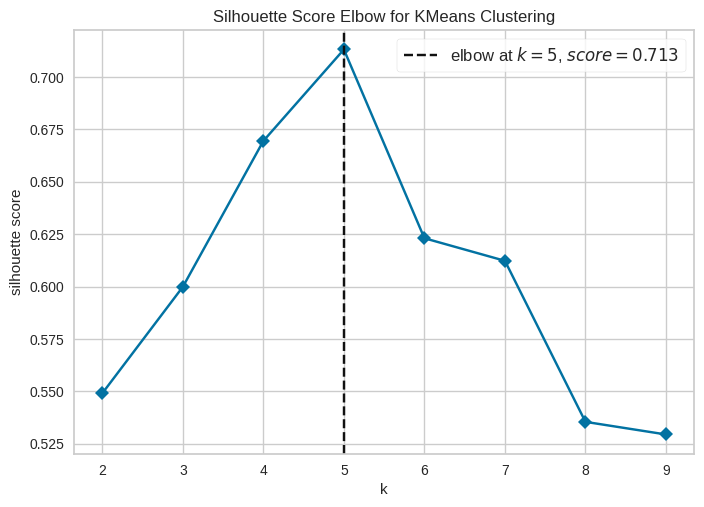

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [48]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer #elbow method
model = KMeans()

elbowvisualizer = KElbowVisualizer(model, k = (2,10), metric = 'silhouette', timings = False)

elbowvisualizer.fit(umap_result)
elbowvisualizer.show()

다섯개가 적당해 보입니다


### 군집화

In [49]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(umap_result)
km_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### plot

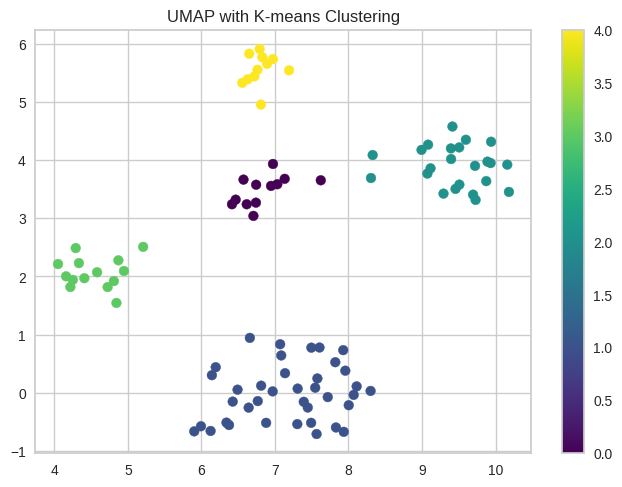

In [50]:
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=km_labels, cmap='viridis')
plt.colorbar()
plt.title('UMAP with K-means Clustering')
plt.show()

호올리 쉬~!!! 나쁘지 않습니다!

여기서 성능을 더욱 높일려면 UMAP의 하이퍼파라미터들을 손봐줘야 합니다.
하지만 일단 거기까지는 가지 않도록 하겠습니다!
궁금하시면 방법 알려드리겠습니다!

## cluster labeling

In [51]:
umap_km = pd.DataFrame(umap_result, columns=['UMAP Dimension{}'.format(i+1) for i in range(umap_result.shape[1])])

umap_km['Cluster'] = km_labels
umap_km

,UMAP Dimension1,UMAP Dimension2,Cluster
0,10.182031,3.451736,2
1,9.720922,3.899461,2
2,8.300518,0.034278,1
3,7.303842,-0.535987,1
4,9.728611,3.314518,2
...,...,...,...
93,6.761907,5.549105,4
94,7.445976,-0.251245,1
95,9.115755,3.856820,2
96,7.935836,-0.668382,1


## Final Data

In [52]:
Data_romance.index = list(range(98))

In [53]:
Data_로맨스.index = list(range(98))

In [54]:
ww2 = pd.concat([Data_romance,umap_km],axis=1)
ww2['시청률'] = Data_로맨스['시청률_y']
ww2['작품명'] = Data_로맨스['작품명']
ww2 = ww2.drop(['UMAP Dimension1','UMAP Dimension2'],axis=1)
ww2

,전체회차,월,화,수,목,금,토,일_y,SF,가족,...,한지혜,한채영,한효주,함은정,현빈,황민현,황정음,Cluster,시청률,작품명
0,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.547875,가면의 여왕
1,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,3.262500,가슴이 뛴다
2,16,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,3.848375,간택 - 여인들의 전쟁
3,32,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,7.035344,결혼작사 이혼작곡 3
4,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.025000,계약우정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,23,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,4,4.560606,하늘의 인연
94,16,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,8.867313,호텔 델루나
95,16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,9.018750,홍천기
96,20,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,6.676150,환혼


자 이제 드라마들이 어떤 클러스터에 속하는지 볼 수 있다.

## cluster별로 분리

In [59]:
cluster0 = ww2[ww2['Cluster']==0]
cluster1 = ww2[ww2['Cluster']==1]
cluster2 = ww2[ww2['Cluster']==2]
cluster3 = ww2[ww2['Cluster']==3]
cluster4 = ww2[ww2['Cluster']==4]

### cluster별 특징?

In [60]:
cluster0

,전체회차,월,화,수,목,금,토,일_y,SF,가족,...,한지혜,한채영,한효주,함은정,현빈,황민현,황정음,Cluster,시청률,작품명
9,64,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.493750,그 남자의 기억법
18,48,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18.311458,낭만닥터 김사부 2
46,80,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.282500,신입사관 구해령
51,64,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.226667,어쩌다 발견한 하루
52,128,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.226667,어쩌다 발견한 하루
56,100,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,27.844000,오! 삼광빌라!
58,64,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.595000,오! 주인님
67,64,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.775000,웰컴2라이프
77,64,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.996875,저녁 같이 드실래요?
79,64,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.206250,조선로코-녹두전


In [61]:
cluster0['시청률'].mean()

7.357190972222223

In [62]:
cluster1['시청률'].mean()

8.513212211028138

In [63]:
cluster2['시청률'].mean()

5.633321488957903

In [64]:
cluster3['시청률'].mean()

4.4203979166666665

In [65]:
cluster4['시청률'].mean()

10.466787451001771

대충 다섯번째 클러스터 안에 있는 로맨스 드라마들의 평균 시청률이 높다는 것을 알 수 있습니다. 그렇다면, 호불호가 심하게 갈리는 로맨스 드라마들은 다섯번째 클러스터 안에 있는 드라마들의 평균적인 특징을 모방 한다면 평타는 치지 않을까요?

반대로 네번째 클러스터에 속해 있는 로맨스 드라마들의 특징을 살펴보고 그들과 똑같은 실수를 하지 않도록 유의해야겠습니다

## 다섯번째 cluster vs 네번째 cluster

In [58]:
#효과적인 비교 방법은 좀 더 고민 해봐야겠습니다!
#일단은 여기까지